In [143]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [144]:
%matplotlib inline

In [145]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [146]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [147]:
names_all = []

for year in range(1880, 2014 + 1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names = ['name','sex','number']))
    names_all[-1]['year'] = year
    
allyears = pd.concat(names_all)

In [148]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [149]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [150]:
total = allyears.groupby(['sex','name'])
totals_bysex = total['number'].sum().unstack('sex')

In [151]:
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [152]:
totals_both = totals_bysex.sum(axis = 1)

In [153]:
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [154]:
ratio = totals_bysex['F'] / totals_bysex['M']

In [155]:
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [156]:
totals_both = totals_both.loc[(ratio > 0.25) & (ratio < 4)].sort_values(ascending = False)

In [157]:
totals_both.head(10)

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
Angel     301425.0
Lee       291691.0
Jessie    274931.0
Marion    259549.0
Dana      243517.0
dtype: float64

In [158]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [159]:
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [160]:
def plotname(sex, name):
    data = allyears_indexed.loc[sex,name]
    
    pp.plot(data.index, data.values, label = name +' '+ sex)

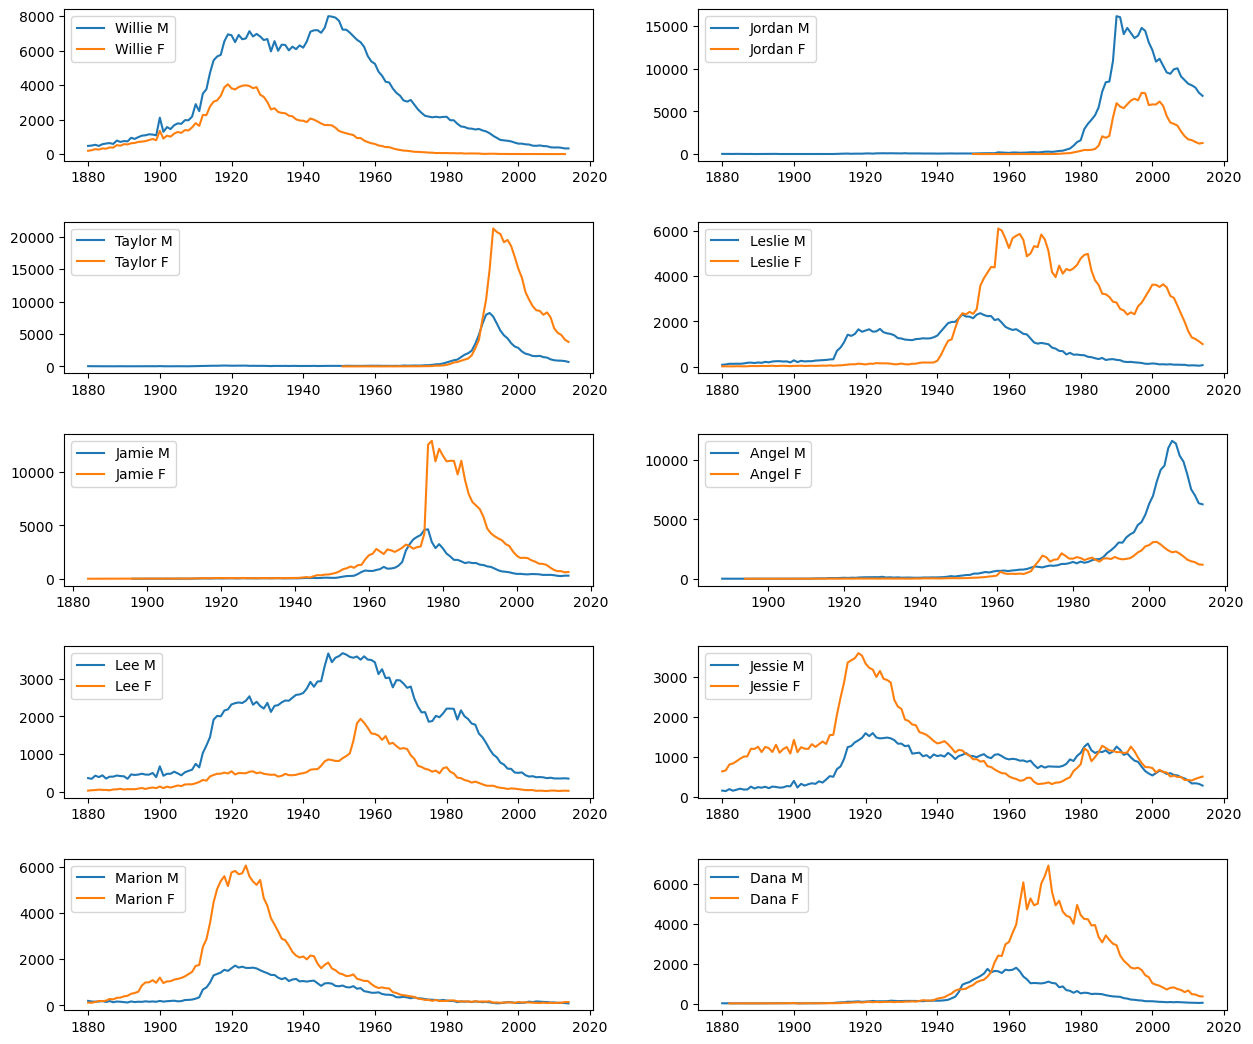

In [162]:
fig = pp.figure(figsize=(15,13))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

i = 1
for name in totals_both.head(10).index:
    if i < 11:
        ax = fig.add_subplot(5, 2, i)
        
    plotname('M',name)
    plotname('F', name)
    ax.legend(loc = 'upper left')
    
    i = i + 1